<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
from math import e
from sklearn.metrics import classification_report

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [25]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [26]:

train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [27]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [28]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

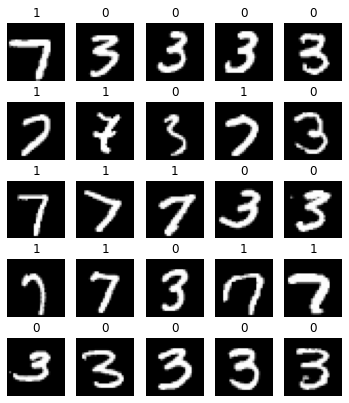

In [29]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [30]:
for x, y in train_loader:
    break

In [31]:
x.shape

torch.Size([128, 1, 28, 28])

In [32]:
x.view(x.shape[0], -1).numpy().shape

(128, 784)

In [33]:

for x, y in train_loader:
    x = x.view(x.shape[0], -1).numpy()
    y = y.numpy()
    break

In [34]:

# количество эпох - полных проходов по датасету
epochs = 3

for n_epoch in range(epochs):
    
    dataset_passed_samples = 0
    
    for x, y in train_loader:
        
        # вот здесь мы могли бы как-то манипулировать с данными
        # например, учить, но пока этого делать не будет
        # только демонстрация
        
        time.sleep(0.05)
        
        dataset_passed_samples += x.shape[0]
        
        dataset_passed_percent = dataset_passed_samples * 100 / train_loader.dataset.data.shape[0]
        
        print(f'Эпоха - {n_epoch + 1}, прошли - {dataset_passed_percent:.2f} % датасета', end='\r')
        
    print('\r')

Эпоха - 1, прошли - 100.00 % датасета
Эпоха - 2, прошли - 100.00 % датасета
Эпоха - 3, прошли - 100.00 % датасета


In [35]:
# таким образом мы создаем матрицу 64 на 512 с рандомными значениями
x = np.random.rand(64, 512)
x

array([[0.11447858, 0.34471851, 0.86619101, ..., 0.44973339, 0.46169791,
        0.86161336],
       [0.69641162, 0.82205522, 0.78194272, ..., 0.76012999, 0.5972939 ,
        0.95610414],
       [0.55334558, 0.6011711 , 0.66378725, ..., 0.82099362, 0.16073091,
        0.24799288],
       ...,
       [0.89314898, 0.618958  , 0.50789852, ..., 0.02198367, 0.94072844,
        0.55786253],
       [0.6397912 , 0.21160085, 0.27954532, ..., 0.10725342, 0.86683653,
        0.89160777],
       [0.0434429 , 0.10868839, 0.98653772, ..., 0.97750643, 0.205791  ,
        0.16184881]])

In [36]:
# большинство функций применяются к каждому элементу массива
# здесь мы каждый элемент массива возвели в квадрат и прибавили к получившемуся значению логарифм элемента матрицы 
x ** 2 + np.log(x)

array([[-2.15426217, -0.94619627,  0.60663705, ..., -0.59684023,
        -0.55967953,  0.59342893],
       [ 0.12317476,  0.47982708,  0.36546062, ...,  0.30353178,
        -0.15858599,  0.86924668],
       [-0.28558122, -0.14746899,  0.03081992, ...,  0.47679058,
        -1.80218927, -1.33285479],
       ...,
       [ 0.68471321, -0.09660884, -0.41951271, ..., -3.81697222,
         0.82386923, -0.27243211],
       [-0.03728063, -1.50827864, -1.19644527, ..., -2.22105756,
         0.60850071,  0.68023544],
       [-3.13442051, -2.20745715,  0.95970296, ...,  0.93276841,
        -1.53854423, -1.79489763]])

In [37]:
y = np.random.rand(512, 1024)
# скалярное произведение
res = np.dot(x, y)

In [38]:
res.shape == (x.shape[0], y.shape[1])

True

In [39]:
x.shape

(64, 512)

In [40]:
res.shape

(64, 1024)

In [41]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)

In [42]:

# res.shape == (x.shape[0], y.shape[1])

In [43]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)


# for x, y in train_loader:
#     x = x.view(x.shape[0], -1).numpy()
#     y = y.numpy()
#     break


In [44]:



learning_rate = 0.01
epochs = 3

w1 = 0.5
b1 = 0.01
w2 = 0.7
b2 = 0.001

loss_func = 0

losses = []

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')
    
    for x, y in train_loader:
        
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)


        func1 = xw1 + b1
        func1 = np.tanh(func1)

        func2 = func1*w2 + b2
        func2 = np.tanh(func2)

        my_y = 1/(1 + np.exp(-func2))
        loss = y*np.log(my_y) + (1-y)*np.log(1-my_y)
        losses.append(loss)
        
        
        # forward
        
        # рассчет bce
        # не забудьте добавить это значение в массив losses
        
        # backward
        
        # gradient descent

Epoch: 1
Epoch: 2
Epoch: 3


In [86]:
fun = x*w1 + b1



In [84]:
fun = np.tanh(fun)

In [85]:
fun

array([[-0.11163919, -0.11163919, -0.11163919, ..., -0.11163919,
        -0.11163919, -0.11163919],
       [-0.11163919, -0.11163919, -0.11163919, ..., -0.11163919,
        -0.11163919, -0.11163919],
       [-0.11163919, -0.11163919, -0.11163919, ..., -0.11163919,
        -0.11163919, -0.11163919],
       ...,
       [-0.11163919, -0.11163919, -0.11163919, ..., -0.11163919,
        -0.11163919, -0.11163919],
       [-0.11163919, -0.11163919, -0.11163919, ..., -0.11163919,
        -0.11163919, -0.11163919],
       [-0.11163919, -0.11163919, -0.11163919, ..., -0.11163919,
        -0.11163919, -0.11163919]], dtype=float32)

In [87]:

fun = 1/(1 + np.exp(-fun))
fun

array([[0.4720027, 0.4720027, 0.4720027, ..., 0.4720027, 0.4720027,
        0.4720027],
       [0.4720027, 0.4720027, 0.4720027, ..., 0.4720027, 0.4720027,
        0.4720027],
       [0.4720027, 0.4720027, 0.4720027, ..., 0.4720027, 0.4720027,
        0.4720027],
       ...,
       [0.4720027, 0.4720027, 0.4720027, ..., 0.4720027, 0.4720027,
        0.4720027],
       [0.4720027, 0.4720027, 0.4720027, ..., 0.4720027, 0.4720027,
        0.4720027],
       [0.4720027, 0.4720027, 0.4720027, ..., 0.4720027, 0.4720027,
        0.4720027]], dtype=float32)